<a href="https://colab.research.google.com/github/alenready/ML_AI_ICT-Assignments/blob/main/Thetabot_gradio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
!pip install nltk spacy textblob transformers
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install gradio
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import gradio as gr


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.9/321.9 kB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 78.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [ ]:
df=pd.read_csv('/content/theta_new.csv')
df

,Unnamed: 0,restaurant_id,category,name,description,price,Review,Rating,city,state,zipcode,address,loc_name,loc_number,latitude,longitude,is_open,closed_message,scan_date,TID
0,0,1,Extra Large Pizza,Extra Large Meat Lovers,Whole pie.,15.99 USD,nice hotel expensive parking got good deal sta...,4,Alexander City,AL,35010,"4097 U S Highway 280, Alexander City, AL 35010",The Saucy Hen (4097 U. S. HIGHWAY 280),0623b7ac-598d-5016-bdd2-febb44d79b12,32.923880,-85.959650,False,Opens at 11:00 AM,2022-11-09 18:03:43,1
1,1,1,Extra Large Pizza,Extra Large Supreme,Whole pie.,15.99 USD,ok nothing special charge diamond member hilto...,2,Albertville,AL,35951,"7300 Hwy 431 North, Albertville, AL 35951",Burger King (7300 Hwy 431 North),62a60773-5644-4d73-b969-a4922ce70fa6,34.277260,-86.206110,True,No message available,2022-11-09 18:03:43,2
2,2,1,Extra Large Pizza,Extra Large Pepperoni,Whole pie.,14.99 USD,nice rooms not 4* experience hotel monaco seat...,3,Alexander City,AL,35010,"4097 Us Highway 280, Alexander City, AL 35010",MrBeast Burger (4097 US Highway 280),308b1654-60f1-51d4-bfe2-ed7c849442ac,32.923880,-85.959650,False,Opens at 11:00 AM,2022-11-09 18:03:43,3
3,3,1,Extra Large Pizza,Extra Large BBQ Chicken &amp; Bacon,Whole Pie,15.99 USD,"unique, great stay, wonderful time hotel monac...",5,Albertville,AL,35950,"7959 Us Hwy 431, Albertville, AL 35950",Taco Bell (7959 Us Highway 431),ef86513f-3973-4315-b938-bb6f230c5c58,34.280000,-86.217030,True,No message available,2022-11-09 18:03:43,4
4,4,1,Extra Large Pizza,Extra Large 5 Cheese,Whole pie.,14.99 USD,"great stay great stay, went seahawk game aweso...",5,Alexander City,AL,35010,"977 Jefferson St, Alexander City, AL 35010",The Station,9507eb1b-5afc-4ee1-a566-526d9e2ba2d0,32.956127,-85.944330,False,Opens at 11:00 AM,2022-11-09 18:03:43,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,21,Shakes - Fruity,Cap'n Crunch Shake,"200 to 250 calories, 24 to 32 grams protein, 1...",8.5 USD,average price hotel good location 1.5 blocks u...,3,Birmingham,AL,35209,"2101 Richard Arrington Jr Blvd S, Birmingham, ...",Walgreens (2101 Richard Arrington Jr Blvd S),9cbad917-b50b-48f6-9a27-8917ec4012a7,33.488530,-86.792370,False,Available at 7:00 AM,2022-11-09 18:03:43,996
996,996,21,Shakes - Fruity,PB Banana Shake,"200 to 250 calories, 24 to 32 grams protein, 1...",8.5 USD,good customer service recently wrote dissatisf...,4,3321 Lorna Rd Birmingham AL 35216,3321,Lorna,3321 Lorna Rd Birmingham AL 35216,"Veggie Mania (3321 Lorna Rd, Birmingham, AL 35...",fab0df13-6da0-5223-94d0-ed77210724ee,33.393530,-86.796730,False,Opens at 11:00 AM,2022-11-09 18:03:43,997
997,997,21,Shakes - Fruity,Banana Bread Shake,"200 to 250 calories, 24 to 32 grams protein, 1...",8.5 USD,ignore bad press just post review reading nega...,4,Birmingham,AL,35205,"1024 20th Street South Unit 101, Birmingham, A...",Ministry Of Curry,d72b60c3-3e53-444e-87d7-957fd18d3469,33.500900,-86.796900,False,Available at 11:00 AM,2022-11-09 18:03:43,998
998,998,21,Shakes - Fruity,Strawberry Banana Shake,"200 to 250 calories, 24 to 32 grams protein, 1...",8.5 USD,"business trip ok hotel fine evening business, ...",3,Hoover,AL,35244,"3020 John Hawkins Pkwy, Hoover, AL 35244",Chick-fil-A (3020 John Hawkins Pkwy),22f33091-d538-46ce-af4b-2b5ed753d1fd,33.371720,-86.812815,False,Available at 6:00 AM,2022-11-09 18:03:43,999


In [ ]:
df_copy=df.copy()

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from nltk.tokenize import word_tokenize, sent_tokenize, RegexpTokenizer, TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
#  spacy on df1 review column and store as df1_spacy

import spacy

# Load the spaCy model (you might need to download it first: python -m spacy download en_core_web_sm)
!python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")

def process_text_spacy(text):
    doc = nlp(text)
    return doc

df1_spacy = df1['Review'].apply(process_text_spacy)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 100.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
#compare the df1 and df1_spacy review length and show the  first 10 rows from both

import pandas as pd
# Assuming df1 and df1_spacy are already defined as in the previous code.

# Calculate review lengths for df1_spacy
df1_spacy_lengths = df1_spacy.apply(len)

# Create a DataFrame for easier comparison (optional)
comparison_df = pd.DataFrame({'df1_Review_length': df1['Review_length'], 'df1_spacy_length': df1_spacy_lengths})

# Display the first 10 rows
print("First 10 rows of df1 Review Lengths:")
print(df1['Review_length'].head(10))
print("\nFirst 10 rows of df1_spacy Review Lengths:")
print(df1_spacy_lengths.head(10))
#Or
print("\nComparison of first 10 rows:")
print(comparison_df.head(10))


First 10 rows of df1 Review Lengths:
0     545
1    1592
2    1358
3     564
4    1175
5     955
6     716
7     578
8     399
9     258
Name: Review_length, dtype: int64

First 10 rows of df1_spacy Review Lengths:
0     81
1    237
2    214
3     86
4    180
5    133
6     99
7     84
8     59
9     34
Name: Review, dtype: int64

Comparison of first 10 rows:
   df1_Review_length  df1_spacy_length
0                545                81
1               1592               237
2               1358               214
3                564                86
4               1175               180
5                955               133
6                716                99
7                578                84
8                399                59
9                258                34


In [ ]:
#  the text review comments from both df1 and df1_spacy


# Display the first 10 text reviews from df1
print("First 10 text reviews from df1:")
print(df1['Review'].head(10))

# Display the first 10 spaCy processed reviews from df1_spacy
print("\nFirst 10 spaCy processed reviews from df1_spacy:")
print(df1_spacy.head(10))


First 10 text reviews from df1:
0    nice hotel expensive parking got good deal sta...
1    ok nothing special charge diamond member hilto...
2    nice room 4 experience hotel monaco seattle go...
3    unique great stay wonderful time hotel monaco ...
4    great stay great stay went seahawk game awesom...
5    love monaco staff husband stayed hotel crazy w...
6    cozy stay rainy city husband spent 7 night mon...
7    excellent staff housekeeping quality hotel cho...
8    hotel stayed hotel monaco cruise room generous...
9    excellent stayed hotel monaco past delight rec...
Name: Review, dtype: object

First 10 spaCy processed reviews from df1_spacy:
0    (nice, hotel, expensive, parking, got, good, d...
1    (ok, nothing, special, charge, diamond, member...
2    (nice, room, 4, experience, hotel, monaco, sea...
3    (unique, great, stay, wonderful, time, hotel, ...
4    (great, stay, great, stay, went, seahawk, game...
5    (love, monaco, staff, husband, stayed, hotel, ...
6    (cozy

In [ ]:
# model training from df1_spacy to target  rating

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming df1_spacy and df1 are defined as in your provided code.
#  and df1['Rating'] column exists, which is the target variable.


# 1. Prepare the Data
X = df1_spacy.astype(str)  # Convert spaCy docs to strings
y = df1['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Feature Extraction (TF-IDF)
tfidf = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# 3. Model Training (Logistic Regression)
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# 4. Model Evaluation
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Example prediction (replace with your own text)
new_review_spacy = nlp("This hotel was amazing! The staff was friendly and helpful.")
new_review_tfidf = tfidf.transform([str(new_review_spacy)])
predicted_rating = model.predict(new_review_tfidf)[0]
print(f"Predicted Rating: {predicted_rating}")


Accuracy: 0.475
Predicted Rating: 5


In [ ]:
#  print each models accuracy

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB


models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Naive Bayes": MultinomialNB()
}

results = {}
for model_name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    print(f"{model_name} Accuracy: {accuracy}")

# Print the results in a clear format
print("\nModel Accuracies:")
for model_name, accuracy in results.items():
    print(f"{model_name}: {accuracy}")


Logistic Regression Accuracy: 0.475
Random Forest Accuracy: 0.45
SVM Accuracy: 0.44
Naive Bayes Accuracy: 0.41

Model Accuracies:
Logistic Regression: 0.475
Random Forest: 0.45
SVM: 0.44
Naive Bayes: 0.41


In [ ]:
# add sentimental analysis for my model training

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import warnings
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
#import gradio as gr
from google.colab import files
from nltk.tokenize import word_tokenize, sent_tokenize, RegexpTokenizer, TweetTokenizer
import spacy
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from textblob import TextBlob

!pip install nltk spacy textblob transformers
warnings.filterwarnings('ignore')
!pip install gradio


# Load the spaCy model (you might need to download it first)
!python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.9/321.9 kB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 111.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 6.9 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 20.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
#  check the prediction of model

import numpy as np
# ... (your existing code) ...

# Example prediction with sentiment analysis
def predict_rating(review):
    new_review_spacy = nlp(review)
    sentiment = get_sentiment(review) # Calculate sentiment for the new review

    # Combine text and sentiment into a single input
    new_review_tfidf = tfidf.transform([str(new_review_spacy)])
    new_review_tfidf_array = new_review_tfidf.toarray()
    new_review_combined = np.concatenate((new_review_tfidf_array, [[sentiment]]), axis=1)

    predicted_rating = model.predict(new_review_combined)[0]
    return predicted_rating

# Test the prediction function
new_review = "This hotel was amazing! The staff was friendly and helpful."
predicted_rating = predict_rating(new_review)
print(f"Predicted Rating for '{new_review}': {predicted_rating}")

new_review = "This hotel was terrible. The staff was rude and unhelpful."
predicted_rating = predict_rating(new_review)
print(f"Predicted Rating for '{new_review}': {predicted_rating}")


Predicted Rating for 'This hotel was amazing! The staff was friendly and helpful.': 5
Predicted Rating for 'This hotel was terrible. The staff was rude and unhelpful.': 1


##Reset again start from ..

In [1]:
# Read the CSV file
import pandas as pd
df = pd.read_csv('/content/theta_new.csv', index_col=0)
# Step 3: Clean the data
# Drop rows where Review or Rating is missing
df = df.dropna(subset=['Review', 'Rating'])
# Clean text: lowercase, remove special characters
def clean_text(text):
 text = text.lower()
 text = text.replace('&amp;', 'and') # Replace HTML entities
 text = ''.join([c for c in text if c.isalnum() or c.isspace()])
 return text
df['Cleaned_Review'] = df['Review'].apply(clean_text)

In [3]:
print(df.head(5))

   restaurant_id           category                                 name  \
0              1  Extra Large Pizza              Extra Large Meat Lovers   
1              1  Extra Large Pizza                  Extra Large Supreme   
2              1  Extra Large Pizza                Extra Large Pepperoni   
3              1  Extra Large Pizza  Extra Large BBQ Chicken &amp; Bacon   
4              1  Extra Large Pizza                 Extra Large 5 Cheese   

  description      price                                             Review  \
0  Whole pie.  15.99 USD  nice hotel expensive parking got good deal sta...   
1  Whole pie.  15.99 USD  ok nothing special charge diamond member hilto...   
2  Whole pie.  14.99 USD  nice rooms not 4* experience hotel monaco seat...   
3   Whole Pie  15.99 USD  unique, great stay, wonderful time hotel monac...   
4  Whole pie.  14.99 USD  great stay great stay, went seahawk game aweso...   

   Rating            city state zipcode  \
0       4  Alexander City

In [4]:
df.columns

Index(['restaurant_id', 'category', 'name', 'description', 'price', 'Review',
       'Rating', 'city', 'state', 'zipcode', 'address', 'loc_name',
       'loc_number', 'latitude', 'longitude', 'is_open', 'closed_message',
       'scan_date', 'TID', 'Cleaned_Review'],
      dtype='object')

In [ ]:
print(clean_text(df['Review'][0]))

nice hotel expensive parking got good deal stay hotel anniversary arrived late evening took advice previous reviews did valet parking check quick easy little disappointed nonexistent view room room clean nice size bed comfortable woke stiff neck high pillows not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway maybe just noisy neighbors aveda bath products nice did not goldfish stay nice touch taken advantage staying longer location great walking distance shopping overall nice experience having pay 40 parking night  


In [5]:
print(df['Cleaned_Review'])


0      nice hotel expensive parking got good deal sta...
1      ok nothing special charge diamond member hilto...
2      nice rooms not 4 experience hotel monaco seatt...
3      unique great stay wonderful time hotel monaco ...
4      great stay great stay went seahawk game awesom...
                             ...                        
995    average price hotel good location 15 blocks un...
996    good customer service recently wrote dissatisf...
997    ignore bad press just post review reading nega...
998    business trip ok hotel fine evening business m...
999    okay downstairs medicore room overrated overpr...
Name: Cleaned_Review, Length: 1000, dtype: object


In [6]:
# Step 4: Split data into features and target
X = df['Cleaned_Review']
y = df['Rating'].astype(int) # Ensure ratings are integers

In [10]:
# Step 5: Split into train and test sets
from sklearn.model_selection import train_test_split # Import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Step 6: Feature extraction with TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer # Import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000) # Limit features to manage memory
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [11]:
# Step 7: Train the model
from sklearn.linear_model import LogisticRegression # Import LogisticRegression
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train_tfidf, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [12]:
# Step 8: Evaluate the model
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.49


In [ ]:
# Step 9: Create Gradio function
def predict_rating(review):
 Cleaned_Review = clean_text(review)
 review_tfidf = tfidf.transform([Cleaned_Review])
 rating = model.predict(review_tfidf)[0]
 return rating

##Reset

In [26]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow.keras.layers as L
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns


import numpy as np
import pandas as pd

import nltk
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import random as rn

import re

In [14]:
seed_value = 1337
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
rn.seed(seed_value)
data = pd.read_csv('/content/theta_new.csv')
data.head()

,Unnamed: 0,restaurant_id,category,name,description,price,Review,Rating,city,state,zipcode,address,loc_name,loc_number,latitude,longitude,is_open,closed_message,scan_date,TID
0,0,1,Extra Large Pizza,Extra Large Meat Lovers,Whole pie.,15.99 USD,nice hotel expensive parking got good deal sta...,4,Alexander City,AL,35010,"4097 U S Highway 280, Alexander City, AL 35010",The Saucy Hen (4097 U. S. HIGHWAY 280),0623b7ac-598d-5016-bdd2-febb44d79b12,32.923880,-85.95965,False,Opens at 11:00 AM,2022-11-09 18:03:43,1
1,1,1,Extra Large Pizza,Extra Large Supreme,Whole pie.,15.99 USD,ok nothing special charge diamond member hilto...,2,Albertville,AL,35951,"7300 Hwy 431 North, Albertville, AL 35951",Burger King (7300 Hwy 431 North),62a60773-5644-4d73-b969-a4922ce70fa6,34.277260,-86.20611,True,No message available,2022-11-09 18:03:43,2
2,2,1,Extra Large Pizza,Extra Large Pepperoni,Whole pie.,14.99 USD,nice rooms not 4* experience hotel monaco seat...,3,Alexander City,AL,35010,"4097 Us Highway 280, Alexander City, AL 35010",MrBeast Burger (4097 US Highway 280),308b1654-60f1-51d4-bfe2-ed7c849442ac,32.923880,-85.95965,False,Opens at 11:00 AM,2022-11-09 18:03:43,3
3,3,1,Extra Large Pizza,Extra Large BBQ Chicken &amp; Bacon,Whole Pie,15.99 USD,"unique, great stay, wonderful time hotel monac...",5,Albertville,AL,35950,"7959 Us Hwy 431, Albertville, AL 35950",Taco Bell (7959 Us Highway 431),ef86513f-3973-4315-b938-bb6f230c5c58,34.280000,-86.21703,True,No message available,2022-11-09 18:03:43,4
4,4,1,Extra Large Pizza,Extra Large 5 Cheese,Whole pie.,14.99 USD,"great stay great stay, went seahawk game aweso...",5,Alexander City,AL,35010,"977 Jefferson St, Alexander City, AL 35010",The Station,9507eb1b-5afc-4ee1-a566-526d9e2ba2d0,32.956127,-85.94433,False,Opens at 11:00 AM,2022-11-09 18:03:43,5


In [16]:
data.isna().sum()

,0
Unnamed: 0,0
restaurant_id,0
category,0
name,0
description,0
price,0
Review,0
Rating,0
city,0
state,0


In [23]:
print(data.values)

[[0 1 'Extra Large Pizza' ... 'Opens at 11:00 AM' '2022-11-09 18:03:43' 1]
 [1 1 'Extra Large Pizza' ... 'No message available'
  '2022-11-09 18:03:43' 2]
 [2 1 'Extra Large Pizza' ... 'Opens at 11:00 AM' '2022-11-09 18:03:43' 3]
 ...
 [997 21 'Shakes - Fruity' ... 'Available at 11:00 AM'
  '2022-11-09 18:03:43' 998]
 [998 21 'Shakes - Fruity' ... 'Available at 6:00 AM'
  '2022-11-09 18:03:43' 999]
 [999 21 'Shakes - Fruity' ... 'Available at 6:00 AM'
  '2022-11-09 18:03:43' 1000]]


In [18]:
def wordCloud_generator(data, title=None):
    wordcloud = WordCloud(width = 800, height = 800,
                          background_color ='black',
                          min_font_size = 10
                         ).generate(" ".join(data.values))
    # plot the WordCloud image
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(title,fontsize=30)
    plt.show()

Most used words in reviews


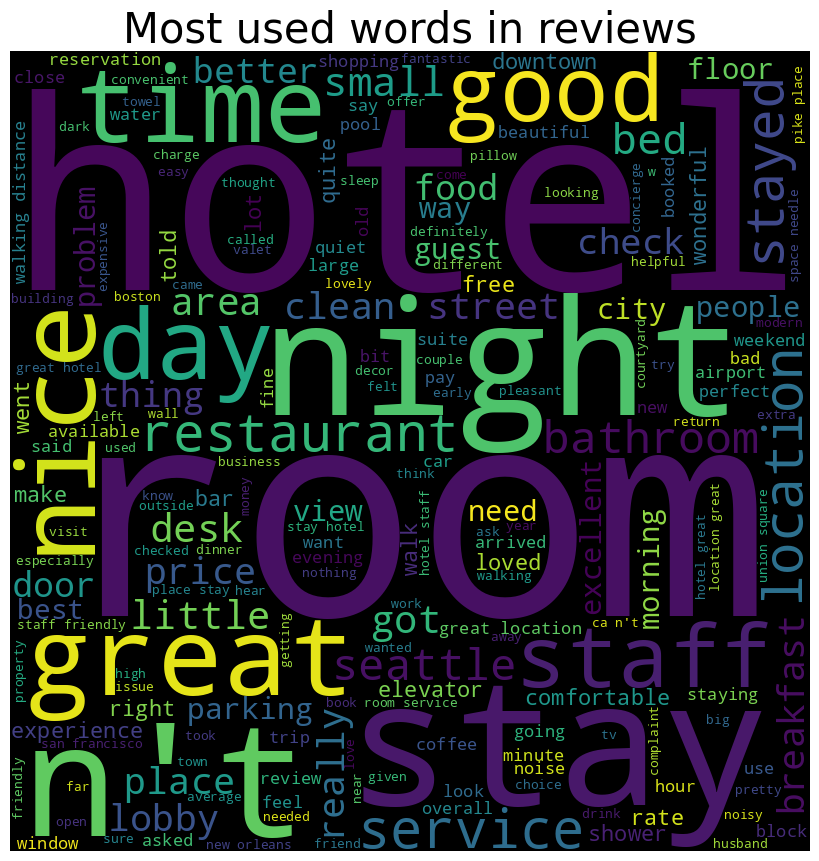

In [20]:
print("Most used words in reviews")
wordCloud_generator(data['Review'], title="Most used words in reviews")


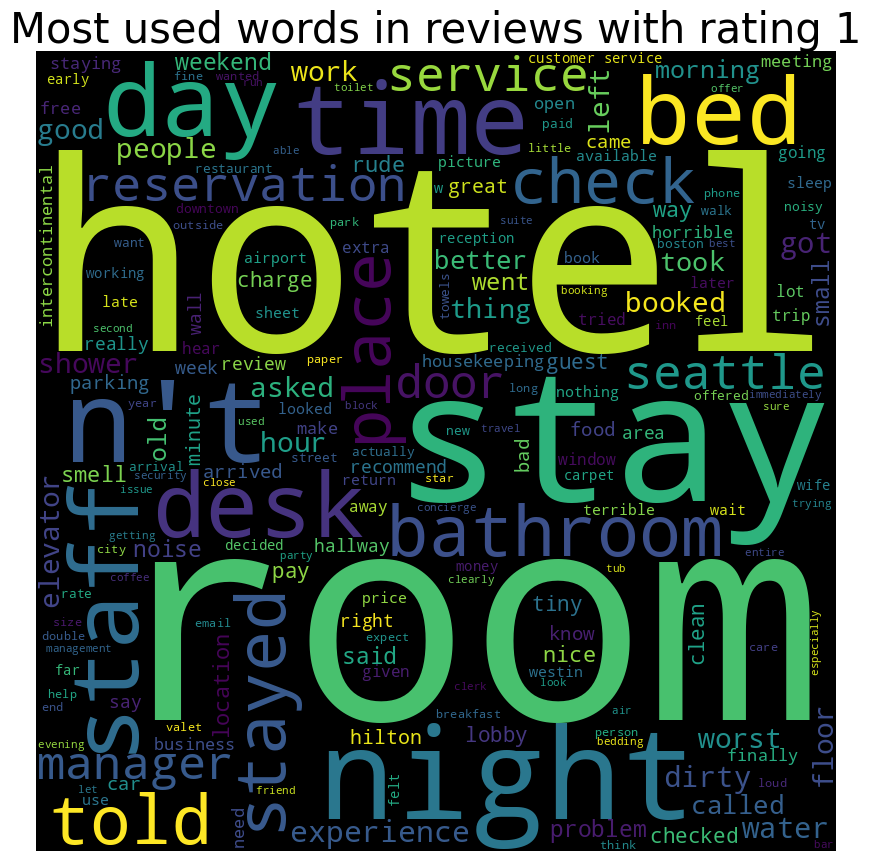

In [27]:
wordCloud_generator(data['Review'][data['Rating']==1], title="Most used words in reviews with rating 1")

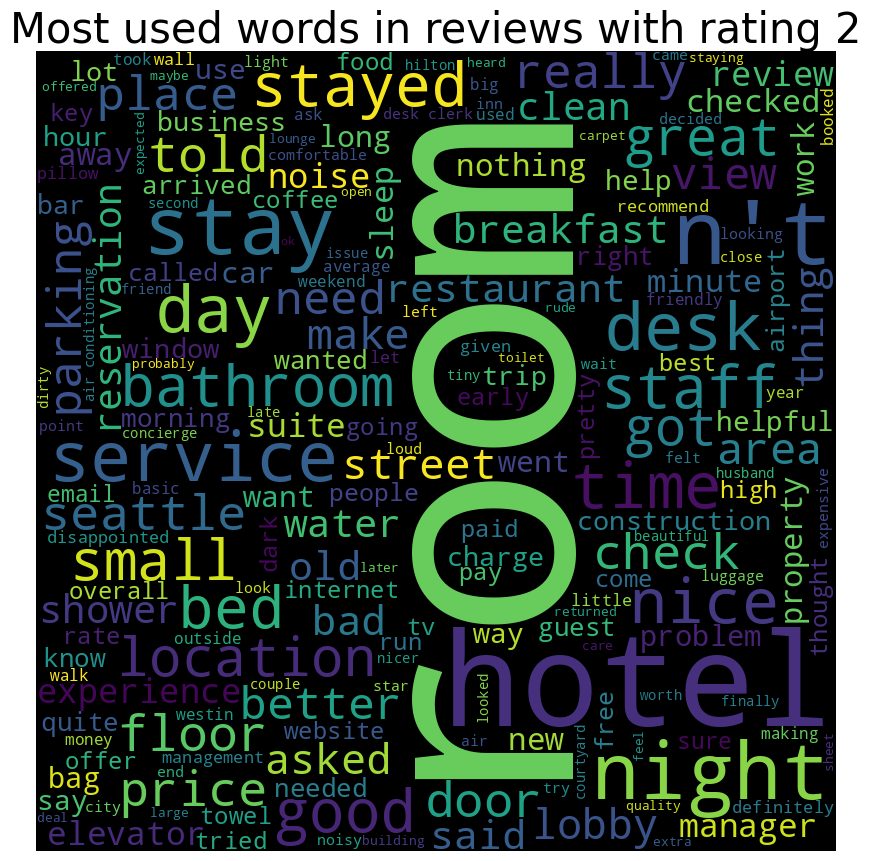

In [28]:
wordCloud_generator(data['Review'][data['Rating']==2], title="Most used words in reviews with rating 2")

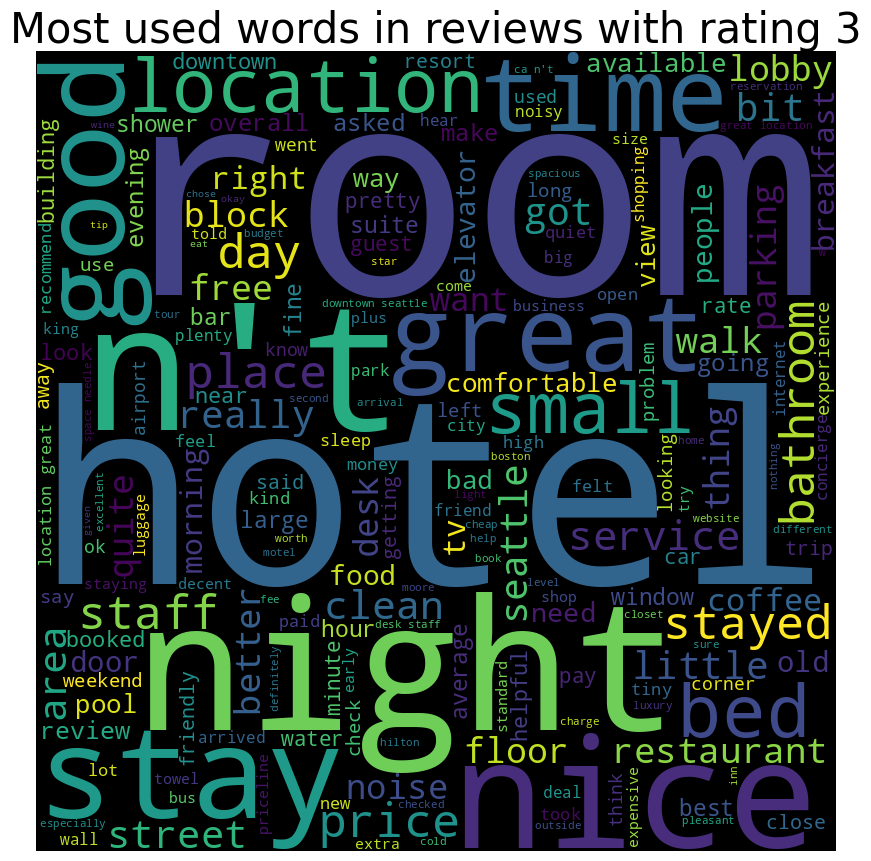

In [29]:
wordCloud_generator(data['Review'][data['Rating']==3], title="Most used words in reviews with rating 3")

## Cleaning

In [59]:
X = data['Review'].copy()
y = data['Rating'].copy()

In [57]:
print(x,y)

NameError: name 'x' is not defined

In [31]:
import nltk
import re
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

# Download the 'stopwords' dataset
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [33]:
def data_cleaner(review):

    # remove digits
    review = re.sub(r'\d+',' ', review)

    #removing stop words
    review = review.split()
    review = " ".join([word for word in review if not word in stop_words])

    #Stemming
    #review = " ".join([ps.stem(w) for w in review])

    return review

ps = PorterStemmer()
stop_words = stopwords.words('english')

X_cleaned = X.apply(data_cleaner)
X_cleaned.head(10)

,Review
0,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...
2,nice rooms * experience hotel monaco seattle g...
3,"unique, great stay, wonderful time hotel monac..."
4,"great stay great stay, went seahawk game aweso..."
5,love monaco staff husband stayed hotel crazy w...
6,"cozy stay rainy city, husband spent nights mon..."
7,"excellent staff, housekeeping quality hotel ch..."
8,"hotel stayed hotel monaco cruise, rooms genero..."
9,excellent stayed hotel monaco past w/e delight...


In [55]:


print(f"Size of the DataFrame: {df.shape}")
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / (1024**2):.2f} MB")


Size of the DataFrame: (1000, 21)
Memory Usage: 2.88 MB


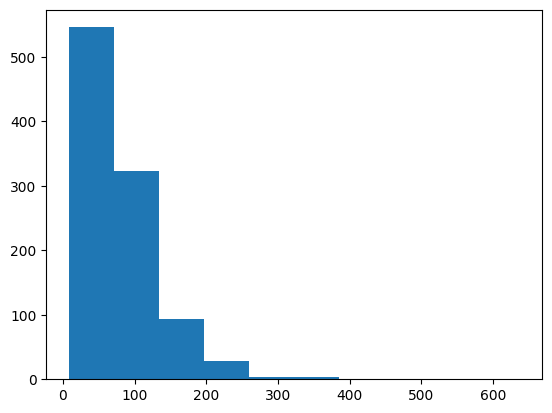

In [36]:
length_dist = [len(x.split(" ")) for x in X_cleaned]
plt.hist(length_dist)
plt.show()

## Tokenisation

In [37]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_cleaned)

X = tokenizer.texts_to_sequences(X_cleaned)

max_length = max([len(x) for x in X])
vocab_size = len(tokenizer.word_index)+1
exp_sen = 1

print("Vocabulary size: {}".format(vocab_size))
print("max length of sentence: {}".format(max_length))
print("\nExample:\n")
print("Sentence:\n{}".format(X_cleaned[exp_sen]))
print("\nAfter tokenizing :\n{}".format(X[exp_sen]))

X = pad_sequences(X, padding='post', maxlen=350)
print("\nAfter padding :\n{}".format(X[exp_sen]))

Vocabulary size: 8710
max length of sentence: 654

Example:

Sentence:
ok nothing special charge diamond member hilton decided chain shot th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroom bedroom unlike kimpton calls suite, day stay offer correct false advertising, send kimpton preferred guest website email asking failure provide suite advertised website reservation description furnished hard copy reservation printout website desk manager duty reply solution, send email trip guest survey follow email mail, guess tell concerned guest.the staff ranged indifferent helpful, asked desk good breakfast spots neighborhood hood told hotels, gee best breakfast spots seattle / block away convenient hotel know exist, arrived late n

In [51]:
encoding = {1: 0,
            2: 1,
            3: 2,
            4: 3,
            5: 4
           }

labels = ['1', '2', '3', '4', '5']
y = data['Rating'].copy()
y.replace(encoding, inplace=True)

In [52]:
print(y)

0      3
1      1
2      2
3      4
4      4
      ..
995    2
996    3
997    3
998    2
999    2
Name: Rating, Length: 1000, dtype: int64


## Model Training

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=67, stratify=y
)

In [ ]:
# prompt: show X_train and Y_train

print(X_train)
y_train


In [54]:
# prompt: ANN MODEL

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import numpy as np
import random as rn
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

# ... (Your existing code) ...


# Define the ANN model
model = Sequential()
model.add(Embedding(vocab_size, 128, input_length=350))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))  # Output layer with 5 units for 5 ratings

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=64) # Adjust epochs and batch size as needed

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")





Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.2620 - loss: 1.5527
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.2986 - loss: 1.4988
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.3080 - loss: 1.4850
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.3072 - loss: 1.4884
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.3166 - loss: 1.4885
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.3064 - loss: 1.4929
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.3232 - loss: 1.4804
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.3161 - loss: 1.4883
Epoch 9/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.3419 - loss: 1.4803
Epoch 10/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.3241 - loss: 1.4808
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 223ms/step - accuracy: 0.3595 - loss: 1.4519
Test Loss: 1.4823377132415771
Test Accuracy: 0.3333333432674408


In [ ]:
print(model.summary())

In [ ]:
data.size

In [ ]:
#  train the ANN model
def train_ann_model(X_train, y_train, X_test, y_test, vocab_size, max_length, epochs=10, batch_size=64, embedding_dim=128, lstm_units_1=128, lstm_units_2=64, dropout_rate=0.2):
    model = Sequential()
    model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
    model.add(LSTM(lstm_units_1, return_sequences=True))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(lstm_units_2))
    model.add(Dropout(dropout_rate))
    model.add(Dense(5, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0) # Set verbose=0 to suppress training output

    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"Test Loss: {loss}")
    print(f"Test Accuracy: {accuracy}")
    return model, accuracy

best_accuracy = 0
best_model = None


epochs_list = [5, 10, 15]
batch_size_list = [32, 64, 128]
embedding_dims = [64, 128, 256]

for epochs in epochs_list:
  for batch_size in batch_size_list:
    for embedding_dim in embedding_dims:
      print(f"Training with epochs={epochs}, batch_size={batch_size}, embedding_dim={embedding_dim}")
      model, accuracy = train_ann_model(X_train, y_train, X_test, y_test, vocab_size, max_length, epochs=epochs, batch_size=batch_size, embedding_dim=embedding_dim)
      if accuracy > best_accuracy:
          best_accuracy = accuracy
          best_model = model
          print(f"New best model found with accuracy: {accuracy}")


# After the loop, best_model will hold the model with the highest accuracy
print(f"Best Model Accuracy: {best_accuracy}")


Training with epochs=5, batch_size=32, embedding_dim=64


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Test Loss: 1.4826703071594238
Test Accuracy: 0.3333333432674408
New best model found with accuracy: 0.3333333432674408
Training with epochs=5, batch_size=32, embedding_dim=128
Test Loss: 1.4882023334503174
Test Accuracy: 0.3333333432674408
Training with epochs=5, batch_size=32, embedding_dim=256
Test Loss: 1.4835360050201416
Test Accuracy: 0.33030304312705994
Training with epochs=5, batch_size=64, embedding_dim=64
Test Loss: 1.4826436042785645
Test Accuracy: 0.3333333432674408
Training with epochs=5, batch_size=64, embedding_dim=128
Test Loss: 1.4840500354766846
Test Accuracy: 0.3333333432674408
Training with epochs=5, batch_size=64, embedding_dim=256
Test Loss: 1.4830156564712524
Test Accuracy: 0.3333333432674408
Training with epochs=5, batch_size=128, embedding_dim=64
Test Loss: 1.4851449728012085
Test Accuracy: 0.3333333432674408
Training with epochs=5, batch_size=128, embedding_dim=128
Test Loss: 1.4856263399124146
Test Accuracy: 0.3333333432674408
Training with epochs=5, batch_siz

In [ ]:
best_model

In [ ]:
best_model.summary()

In [ ]:
# Example prediction (assuming you have a new review)
#
new_review = "This is a great hotel!"  # Example new review

# 1. Clean the new review

 new_review_cleaned = data_cleaner(new_review)

# 2. Tokenize the new review
new_review_tokenized = tokenizer.texts_to_sequences([new_review_cleaned])

# 3. Pad the tokenized sequence
 new_review_padded = pad_sequences(new_review_tokenized, padding='post', maxlen=350)

# 4. Predict the rating
 prediction = model.predict(new_review_padded)
 predicted_rating = np.argmax(prediction) + 1  # Convert to original rating scale

 print(f"Predicted rating for the new review: {predicted_rating}")


#Launch Gradio interface

In [ ]:
# Step 10: Launch Gradio interface
!pip install gradio # install gradio
import gradio as gr # import gradio and assign the name gr for access within the code
iface = gr.Interface(
fn=predict_rating,
inputs=gr.Textbox(lines=2, placeholder="Enter your review here..."),
outputs="number",
title="Restaurant Review Rating Predictor",
description="Enter a restaurant review to predict its rating (1-5 stars)."
)
iface.launch()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.9/321.9 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 97.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://2e9a5cd4a2260125fa.gradio.live

This share link expires in 72 hours.

#Code_gradichatbot

In [ ]:
import gradio as gr
import pandas as pd
from geopy.distance import geodesic

# Load the dataset
df = pd.read_csv('/content/theta_new.csv')

def recommend_food(user_query, user_lat, user_lon):
    """Search for food items and recommend the best restaurant."""

    # Filter dataset based on food description matching user query
    matching_items = df[df['category'].str.contains(user_query, case=False, na=False)]
    matching_items = df[df['name'].str.contains(user_query, case=False, na=False)]
    matching_items = df[df['description'].str.contains(user_query, case=False, na=False)]
    if matching_items.empty:
        return "Sorry, we couldn't find that food item."

    # Find the nearest restaurant
    def get_distance(row):
        return geodesic((user_lat, user_lon), (row['latitude'], row['longitude'])).miles

    matching_items['distance'] = matching_items.apply(get_distance, axis=1)
    nearest_restaurant = matching_items.loc[matching_items['distance'].idxmin()]

    # Classify the restaurant rating
    rating = nearest_restaurant['Rating']
    if rating >= 4:
        quality = "Best"
    elif rating >= 3:
        quality = "Average"
    else:
        quality = "Poor"

    # Format response
    response = (f"We found '{nearest_restaurant['name']}' for you!\n"
                f"Located at: {nearest_restaurant['address']} ({nearest_restaurant['city']}, {nearest_restaurant['state']})\n"
                f"Distance: {nearest_restaurant['distance']:.2f} miles away\n"
                f"Restaurant Rating: {rating}/5 ({quality})")

    return response

# Create the Gradio chatbot interface
iface = gr.Interface(
    fn=recommend_food,
    inputs=["text", "number", "number"],  # User food request, latitude, longitude
    outputs="text",
    title="AI Food Ordering Chatbot",
    description="Ask for any food, and we'll find the best nearby restaurant for you!"
)

iface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://25b965cdc0489571fd.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:

import gradio as gr
import pandas as pd
from geopy.distance import geodesic

# Load the dataset
df = pd.read_csv('/content/theta_new.csv')

def recommend_food(user_query, user_lat, user_lon, budget):
    """Search for food items and recommend the best restaurant based on query and budget."""

    # Filter dataset based on food description, category, name, or city
    matching_items = df[df[['description', 'category', 'name', 'city']].apply(lambda x: x.str.contains(user_query, case=False, na=False)).any(axis=1)]

    if matching_items.empty:
        return "Sorry, we couldn't find that food item."

    # Convert price column to numeric and filter based on budget
    df['price'] = df['price'].replace('[^0-9.]', '', regex=True).astype(float)
    matching_items = matching_items[matching_items['price'] <= budget]

    if matching_items.empty:
        return "No options available within your budget."

    # Find the nearest restaurant
    def get_distance(row):
        return geodesic((user_lat, user_lon), (row['latitude'], row['longitude'])).miles

    matching_items['distance'] = matching_items.apply(get_distance, axis=1)
    nearest_restaurant = matching_items.loc[matching_items['distance'].idxmin()]

    # Classify the restaurant rating
    rating = nearest_restaurant['Rating']
    if rating >= 4:
        quality = "Best"
    elif rating >= 3:
        quality = "Average"
    else:
        quality = "Poor"

    # Format response
    response = (f"We found '{nearest_restaurant['name']}' for you!\n"
                f"Category: {nearest_restaurant['category']}\n"
                f"Located at: {nearest_restaurant['address']} ({nearest_restaurant['city']}, {nearest_restaurant['state']})\n"
                f"Distance: {nearest_restaurant['distance']:.2f} miles away\n"
                f"Price: ${nearest_restaurant['price']}\n"
                f"Restaurant Rating: {rating}/5 ({quality})")

    return response

# Create the Gradio chatbot interface
iface = gr.Interface(
    fn=recommend_food,
    inputs=["text", "number", "number", "number"],  # User food request, latitude, longitude, budget
    outputs="text",
    title="AI Food Ordering Chatbot",
    description="Ask for any food, and we'll find the best nearby restaurant within your budget!"
)

iface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://0c7d614cf57e489a91.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
